In [ ]:
#We will make a basic CNN model to classify CIFAR-100#
#We will use Keras from Tensorflow to build the model#

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import datetime

#show the tensorflow version
print(tf.__version__)

2.15.0


In [ ]:
#Test if have GPU
print(tf.config.list_physical_devices('GPU'))

[]


In [ ]:
#load the CIFAR-100 dataset & split into train and test sets
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

#Normalize pixel values from 1-255 to 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

#show the shape of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
#shuffle train & test data

# # Assuming x_train and y_train are your data
# indices = np.arange(x_train.shape[0])
# np.random.shuffle(indices)

# # Let's say we want to select 10000 random samples
# x_train_subset = x_train[indices[:10000]]
# y_train_subset = y_train[indices[:10000]]

In [16]:
#Build model

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Block 2.5
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(512, (4, 4), activation='relu', padding='valid'))
# model.add(Dropout(0.15))
model.add(Conv2D(512, (1, 1), activation='relu', padding='same'))
# model.add(Dropout(0.15))

# Block 4
model.add(Flatten())
model.add(Dense(256, activation='relu'))

# Block 5
model.add(Dense(100, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                

In [17]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])
#save loss & validation loss every
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/10
1563/1563 [==============================] - 336s 213ms/step - loss: 4.1545 - accuracy: 0.0523 - val_loss: 3.7924 - val_accuracy: 0.0979
Epoch 2/10
1563/1563 [==============================] - 323s 207ms/step - loss: 3.5936 - accuracy: 0.1370 - val_loss: 3.3551 - val_accuracy: 0.1845
Epoch 3/10
1563/1563 [==============================] - 329s 211ms/step - loss: 3.2668 - accuracy: 0.1989 - val_loss: 3.1475 - val_accuracy: 0.2302
Epoch 4/10
1563/1563 [==============================] - 338s 217ms/step - loss: 3.0528 - accuracy: 0.2393 - val_loss: 2.9879 - val_accuracy: 0.2605
Epoch 5/10
1563/1563 [==============================] - 326s 208ms/step - loss: 2.8825 - accuracy: 0.2738 - val_loss: 2.9387 - val_accuracy: 0.2705
Epoch 6/10
1563/1563 [==============================] - 315s 201ms/step - loss: 2.7451 - accuracy: 0.3005 - val_loss: 2.8249 - val_accuracy: 0.2965
Epoch 7/10
1563/1563 [==============================] - 319s 204ms/step - loss: 2.6202 - accuracy: 0.3247 - val_

In [1]:
print(val_loss)

NameError: name 'val_loss' is not defined

In [ ]:
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 25s - loss: 2.7278 - accuracy: 0.3496 - 25s/epoch - 81ms/step

Test accuracy: 0.3495999872684479


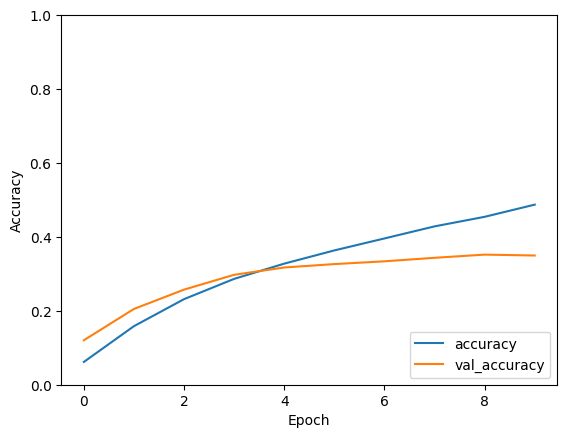

In [ ]:
#Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


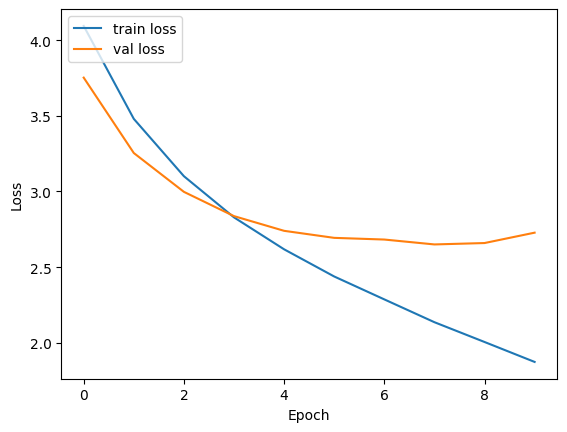

In [ ]:
#plot loss
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label = 'val loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
#legend
plt.legend(loc='upper left')
#show plot
plt.show()
